In [9]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
import mpl_toolkits
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

%matplotlib inline

In [10]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         190       RL         90.0    15750   Pave   NaN      Reg   
1   2          60       RL         66.0    16226   Pave   NaN      IR3   
2   3          20       RL        118.0    13704   Pave   NaN      IR1   
3   4          20       RL         70.0     9800   Pave   NaN      Reg   
4   5          75       RM         87.0    18386   Pave   NaN      Reg   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN  GdWo         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      6   2006        WD         Normal     157000  
1      5   2007        WD         Normal     267000  
2      1   2006        WD         Normal     205000  
3      7   2006        WD        Abnorml     149900  
4      5   2008        WD         Normal     295000  

[5 rows x 81 columns]

In [11]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1160, 81)
Test data shape: (1459, 80)


In [8]:
train.SalePrice.describe()


count      1160.000000
mean     180756.519828
std       80872.738245
min       34900.000000
25%      129975.000000
50%      162000.000000
75%      213310.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.9901321689326625


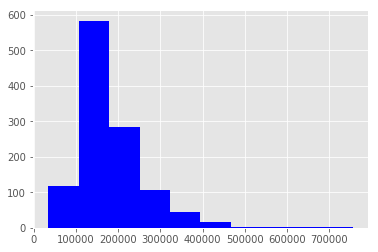

In [13]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

Skew is: 0.1312866671654987


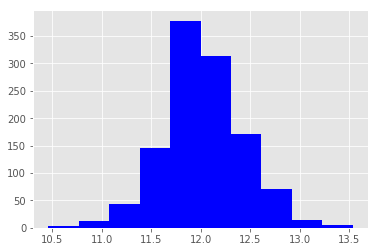

In [14]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [15]:
# Working with Numeric Features

numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [16]:
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.785860
GrLivArea      0.699584
GarageCars     0.629773
TotalBsmtSF    0.615875
Name: SalePrice, dtype: float64 

LowQualFinSF    -0.041842
OverallCond     -0.082975
MSSubClass      -0.084022
KitchenAbvGr    -0.128064
EnclosedPorch   -0.135188
Name: SalePrice, dtype: float64


In [17]:
train.OverallQual.unique()


array([ 5,  8,  7,  6,  4,  9,  3,  1, 10,  2])

In [49]:
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)

In [50]:
quality_pivot

SalePrice
OverallQual           
1              50150.0
2              60000.0
3              89250.0
4             108000.0
5             134000.0
6             159000.0
7             199200.0
8             271000.0
9             338821.5
10            451950.0

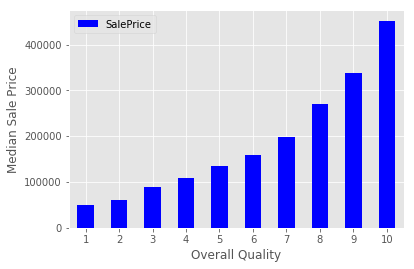

In [51]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

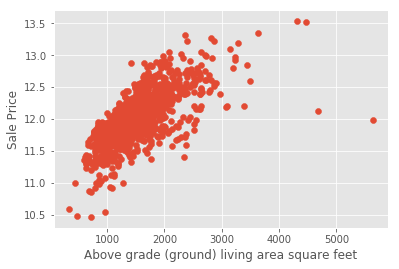

In [22]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

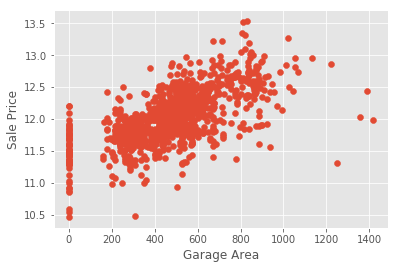

In [23]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [24]:
train = train[train['GarageArea'] < 1200]


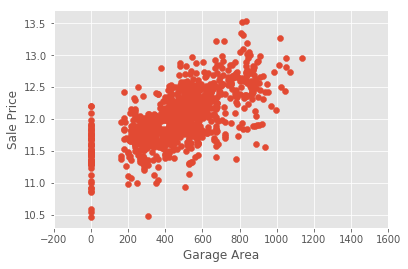

In [25]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [26]:
# Handling Null Values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

Null Count
Feature                 
PoolQC              1150
MiscFeature         1115
Alley               1081
Fence                943
FireplaceQu          544
LotFrontage          208
GarageCond            61
GarageType            61
GarageYrBlt           61
GarageFinish          61
GarageQual            61
BsmtExposure          31
BsmtFinType2          31
BsmtFinType1          30
BsmtCond              30
BsmtQual              30
MasVnrArea             7
MasVnrType             7
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0

In [27]:
print ("Unique values are:", train.MiscFeature.unique())


Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [28]:
# working with the non-numeric Features

categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()


MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1155   1155    74     1155        1155      1155      1155   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq        916   1151    41      733        1034      1154       850   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1155         1155       1155      ...            1094   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1088          178        993      ...             688   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1094       1094       1094       1155      5    212   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Fa  MnPrv   
freq            480       1043       1050       1055      2    116   

       MiscFeature SaleType SaleCondition  
count           40     1155          1155  
unique           4        9             6  
top           Shed       WD        Normal  
freq            35     1009           952  

[4 rows x 43 columns]

In [29]:
print ("Original: \n")
print (train.Street.value_counts(), "\n")

Original: 

Pave    1151
Grvl       4
Name: Street, dtype: int64 



In [30]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [31]:
print ('Encoded: \n')
print (train.enc_street.value_counts())

Encoded: 

1    1151
0       4
Name: enc_street, dtype: int64


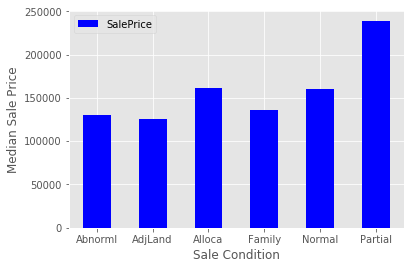

In [32]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [33]:
def encode(x):
 return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

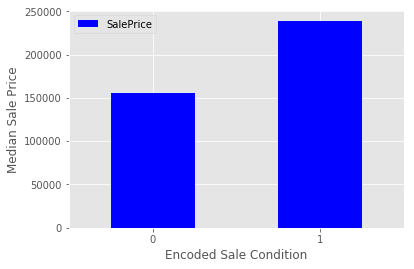

In [34]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [35]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()


In [36]:
sum(data.isnull().sum() != 0)


0

In [37]:
# Build a linear model
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33)

In [40]:
lr = LinearRegression()


In [41]:
model = lr.fit(X_train, y_train)


In [42]:
print ("R^2 is: \n", model.score(X_test, y_test))


R^2 is: 
 0.8628955678918665


In [43]:
predictions = model.predict(X_test)


In [46]:
print ('RMSE is: \n', mean_squared_error(y_test, predictions))


RMSE is: 
 0.02144023589965429


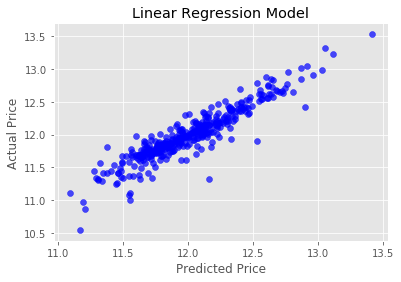

In [47]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

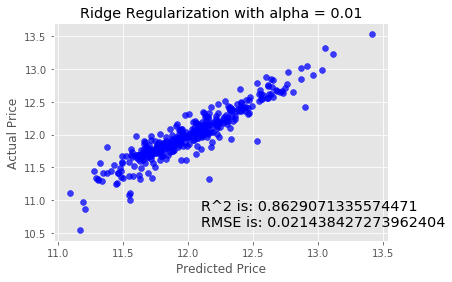

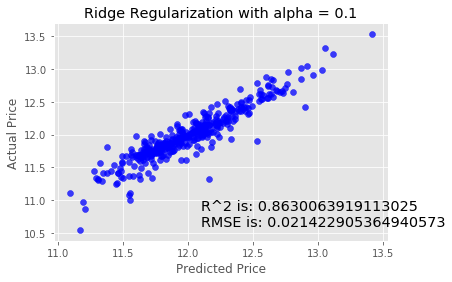

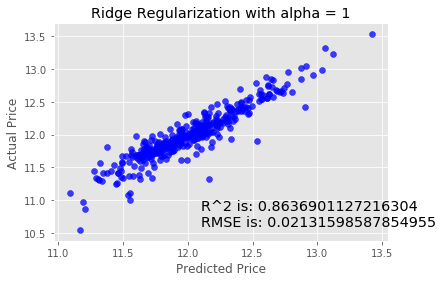

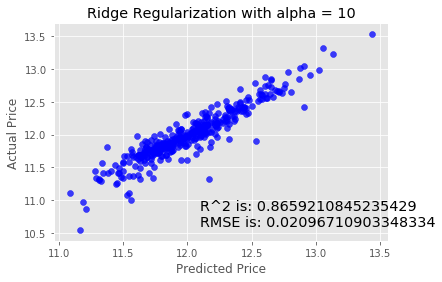

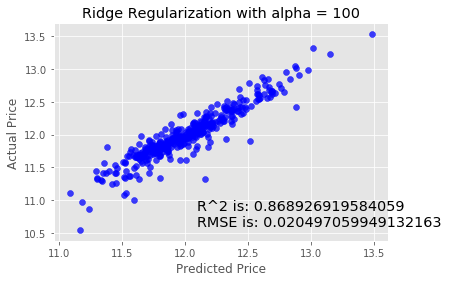

In [48]:
# Try to improve the model
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()